In [1]:
import tensorflow as tf

In [2]:
X = [1,2,3]
Y = [1,2,3]

W = tf.placeholder(tf.float32)
hypothesis = X * W

In [4]:
cost = tf.reduce_mean(tf.square(hypothesis - Y))
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [5]:
W_val = []
cost_val = []

for i in range(-30,50):
    feed_W = i * 0.1
    curr_cost, curr_W = sess.run([cost,W], feed_dict={W : feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)

/home/river0726/anaconda3/envs/tf/lib/python3.5/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


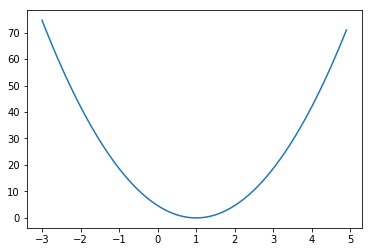

In [6]:
import matplotlib.pyplot as plt

plt.plot(W_val,cost_val)
plt.show()

## own optimizer ##

In [9]:
W = tf.Variable(tf.random_normal([1]), name = 'weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

hypothesis = X * W

cost = tf.reduce_mean(tf.square(hypothesis - Y))

learning_rate = 0.1
gradient = tf.reduce_mean((W*X - Y)*X)
descent = W - learning_rate * gradient
update = W.assign(descent)
# 이 부분은 tensorflow 의 gradient descent optimizer 함수를 쓸 수 있음

In [11]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(21):
    sess.run(update, feed_dict= {X:[1,2,3], Y:[1,2,3]})
    print(step, sess.run(cost, feed_dict={X:[1,2,3,], Y:[1,2,3,]}), sess.run(W))

0 4.06742 [ 0.06640977]
1 1.15696 [ 0.50208521]
2 0.32909 [ 0.73444545]
3 0.0936077 [ 0.8583709]
4 0.0266262 [ 0.92446446]
5 0.00757369 [ 0.95971435]
6 0.00215429 [ 0.97851431]
7 0.000612778 [ 0.98854095]
8 0.000174301 [ 0.9938885]
9 4.958e-05 [ 0.99674052]
10 1.41025e-05 [ 0.99826163]
11 4.01139e-06 [ 0.99907285]
12 1.14105e-06 [ 0.99950552]
13 3.24665e-07 [ 0.99973625]
14 9.23402e-08 [ 0.99985933]
15 2.62706e-08 [ 0.99992496]
16 7.48696e-09 [ 0.99995995]
17 2.11979e-09 [ 0.99997866]
18 6.03475e-10 [ 0.99998862]
19 1.71047e-10 [ 0.99999392]
20 4.97629e-11 [ 0.99999672]


## check inside of tensorflow optimizer##

In [27]:
W = tf.Variable(5.)
X = [1,2,3]
Y = [1,2,3]

hypothesis = X * W

gradient = tf.reduce_mean((W*X - Y)*X) * 2

cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)

gvs = optimizer.compute_gradients(cost,[W])
apply_gradient = optimizer.apply_gradients(gvs)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(100):
    print(step, sess.run(gradient), sess.run(W), sess.run(gvs))
    sess.run(apply_gradient)
    

0 37.3333 5.0 [(37.333336, 5.0)]
1 33.8489 4.62667 [(33.848888, 4.6266665)]
2 30.6897 4.28818 [(30.689657, 4.2881775)]
3 27.8253 3.98128 [(27.825287, 3.9812808)]
4 25.2283 3.70303 [(25.228264, 3.703028)]
5 22.8736 3.45075 [(22.873623, 3.4507453)]
6 20.7388 3.22201 [(20.738752, 3.2220092)]
7 18.8031 3.01462 [(18.803137, 3.0146217)]
8 17.0482 2.82659 [(17.048176, 2.8265903)]
9 15.457 2.65611 [(15.457014, 2.6561086)]
10 14.0144 2.50154 [(14.01436, 2.5015385)]
11 12.7064 2.36139 [(12.706352, 2.3613949)]
12 11.5204 2.23433 [(11.520427, 2.2343314)]
13 10.4452 2.11913 [(10.445186, 2.119127)]
14 9.4703 2.01468 [(9.4703016, 2.0146751)]
15 8.58641 1.91997 [(8.5864067, 1.9199722)]
16 7.78501 1.83411 [(7.7850089, 1.8341081)]
17 7.05841 1.75626 [(7.0584083, 1.756258)]
18 6.39962 1.68567 [(6.3996239, 1.685674)]
19 5.80233 1.62168 [(5.8023257, 1.6216778)]
20 5.26078 1.56365 [(5.260776, 1.5636545)]
21 4.76977 1.51105 [(4.7697697, 1.5110468)]
22 4.32459 1.46335 [(4.3245912, 1.4633491)]
23 3.92096 1.420